In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from crypto_chatter.graph import *

import networkx as nx

data_source = 'twitter'
index_name = 'blockchain-interoperability-attacks'

In [2]:
graph = CryptoTwitterUserGraph(index_name)

loaded graph edges in 2 seconds
loaded cached graph data in 181 seconds
constructed complete user graph in 196 seconds


In [3]:
G = graph.G

In [4]:
df = graph.data

In [5]:
len(df)

16625047

In [6]:
df.columns

Index(['created_at', 'extended_tweet.full_text', 'favorite_count', 'full_text',
       'geo', 'geo.coordinates', 'geo.type', 'id', 'quote_count',
       'quoted_status.created_at', 'quoted_status.extended_tweet.full_text',
       'quoted_status.favorite_count', 'quoted_status.full_text',
       'quoted_status.geo', 'quoted_status.id', 'quoted_status.quote_count',
       'quoted_status.reply_count', 'quoted_status.retweet_count',
       'quoted_status.text', 'quoted_status.truncated',
       'quoted_status.user.created_at', 'quoted_status.user.followers_count',
       'quoted_status.user.friends_count', 'quoted_status.user.geo_enabled',
       'quoted_status.user.id', 'quoted_status.user.location', 'reply_count',
       'retweet_count', 'text', 'truncated',
       'truncatedquoted_status.truncated', 'user.created_at',
       'user.followers_count', 'user.friends_count', 'user.geo_enabled',
       'user.id', 'user.location', 'quoted_status.geo.coordinates',
       'quoted_status.geo.type

In [7]:
len(G.nodes)

1640251

In [8]:
len(G.edges)

2520608

In [9]:
df.head()

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
0,Fri Nov 11 12:03:53 +0000 2022,NaN,0,"@0x5ab0 @Uniswap oh, missed fiat part, just sa...",NaN,NaN,NaN,1591039006850310148,0,NaN,...,False,NaN,Mon Jul 11 06:36:43 +0000 2011,7050,5554,True,333239871,"CARBONdale, CO",NaN,NaN
1,Fri Nov 11 12:03:53 +0000 2022,Never seen such a deal for a punk since 2017! ...,0,Never seen such a deal for a punk since 2017! ...,NaN,NaN,NaN,1591039006770622468,0,Fri Nov 11 11:00:59 +0000 2022,...,True,NaN,Wed Nov 09 14:09:46 +0000 2022,0,2,False,1590345908172083201,Netherlands,NaN,NaN
2,Fri Nov 11 12:03:53 +0000 2022,Collection: ens \n Sold for: 1.0040189 Eth (12...,0,Collection: ens \n Sold for: 1.0040189 Eth (12...,NaN,NaN,NaN,1591039006501994503,0,NaN,...,True,NaN,Sun May 01 15:06:34 +0000 2022,106,2,False,1520781667769614337,blockchain,NaN,NaN
3,Fri Nov 11 12:03:54 +0000 2022,@Rocket_Moonshot @NzXrp @Bitboy_Crypto @digita...,0,@Rocket_Moonshot @NzXrp @Bitboy_Crypto @digita...,NaN,NaN,NaN,1591039007357550592,0,NaN,...,True,NaN,Wed Dec 18 21:46:55 +0000 2013,0,0,False,2252580014,None,NaN,NaN
4,Fri Nov 11 12:03:54 +0000 2022,@abu_crypto1 🩸 Scary bunny is a meme token wit...,0,@abu_crypto1 🩸 Scary bunny is a meme token wit...,NaN,NaN,NaN,1591039007764668417,0,NaN,...,True,NaN,Tue Oct 25 03:46:04 +0000 2022,3,50,False,1584753080113025025,None,NaN,NaN


In [10]:
degrees = dict(G.degree())
degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
degrees = [degree for _, degree in degrees]

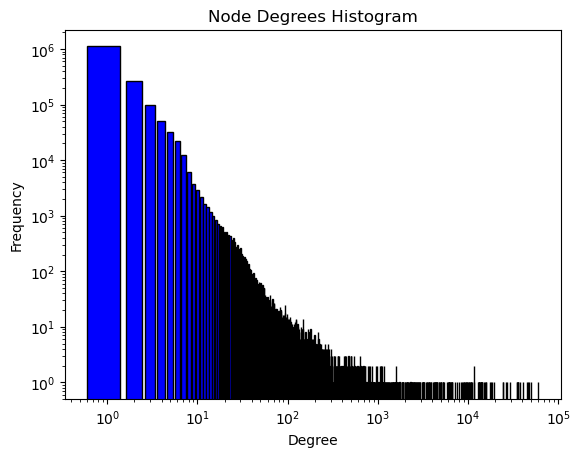

In [11]:
unique_degrees, degree_frequencies = np.unique(degrees, return_counts=True)
plt.bar(unique_degrees, degree_frequencies, color='blue', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title('Node Degrees Histogram')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [88]:
degrees = dict(G.degree())
degrees_values = list(degrees.values())

# In-Degree
in_degrees = dict(G.in_degree())
in_degrees_values = list(in_degrees.values())

# Out-Degree
out_degrees = dict(G.out_degree())
out_degrees_values = list(out_degrees.values())

# Overall Degree Statistics
mean_degree = np.mean(degrees_values)
median_degree = np.median(degrees_values)
max_degree = np.max(degrees_values)
std_degree = np.std(degrees_values)

print("Overall Degree Statistics:")
print(f"Mean: {mean_degree}")
print(f"Median: {median_degree}")
print(f"Max: {max_degree}")
print(f"Standard Deviation: {std_degree}")

# In-Degree Statistics
mean_in_degree = np.mean(in_degrees_values)
median_in_degree = np.median(in_degrees_values)
max_in_degree = np.max(in_degrees_values)
std_in_degree = np.std(in_degrees_values)

print("\nIn-Degree Statistics:")
print(f"Mean: {mean_in_degree}")
print(f"Median: {median_in_degree}")
print(f"Max: {max_in_degree}")
print(f"Standard Deviation: {std_in_degree}")

# Out-Degree Statistics
mean_out_degree = np.mean(out_degrees_values)
median_out_degree = np.median(out_degrees_values)
max_out_degree = np.max(out_degrees_values)
std_out_degree = np.std(out_degrees_values)

print("\nOut-Degree Statistics:")
print(f"Mean: {mean_out_degree}")
print(f"Median: {median_out_degree}")
print(f"Max: {max_out_degree}")
print(f"Standard Deviation: {std_out_degree}")

Overall Degree Statistics:
Mean: 3.0734418086012445
Median: 1.0
Max: 59825
Standard Deviation: 144.90518822469494

In-Degree Statistics:
Mean: 1.5367209043006222
Median: 1.0
Max: 3736
Standard Deviation: 6.068001288963873

Out-Degree Statistics:
Mean: 1.5367209043006222
Median: 0.0
Max: 59825
Standard Deviation: 144.78788425976285


In [12]:
all_scc = list(nx.strongly_connected_components(G))
all_scc = sorted(all_scc, key=len, reverse=True)

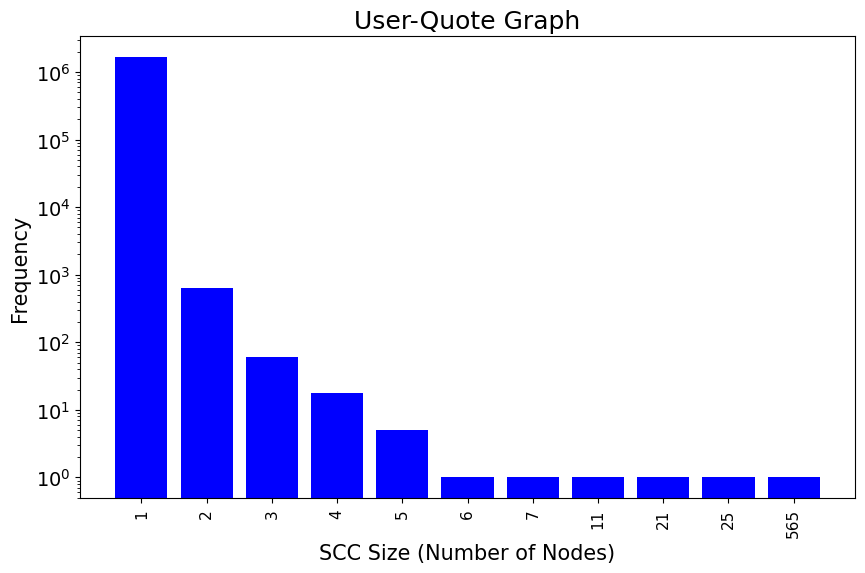

In [133]:
scc_sizes = [len(scc) for scc in all_scc]
scc_sizes, scc_frequencies = np.unique(scc_sizes, return_counts=True)

plt.figure(figsize=(10, 6))

# Plot the histogram with x-axis treated as categorical
plt.bar(range(len(scc_sizes)), scc_frequencies, color='blue')
plt.xticks(range(len(scc_sizes)), scc_sizes, rotation='vertical')
plt.yscale('log')
plt.title('User-Quote Graph')
plt.xlabel('SCC Size (Number of Nodes)')
plt.ylabel('Frequency')
plt.show()

In [14]:
def visualize_scc(G, scc, show_labels = False):
    
    subgraph = G.subgraph(scc)

    pos = nx.kamada_kawai_layout(subgraph)
        
    nx.draw(
            subgraph,
            pos,
            node_color='skyblue',
            node_size=100,
            font_size=6,
            font_color='black',
            font_weight='bold',
            edge_color='gray',
            linewidths=1,
            alpha=0.7
        )
     
    if show_labels:
            
        label_pos = {k: (x, y - 0.12) for k, (x, y) in pos.items()}
        nx.draw_networkx_labels(subgraph, label_pos, font_size=6, font_color='black', font_weight='bold')

    
    plt.title('Connected Component Visualization')
    plt.show()

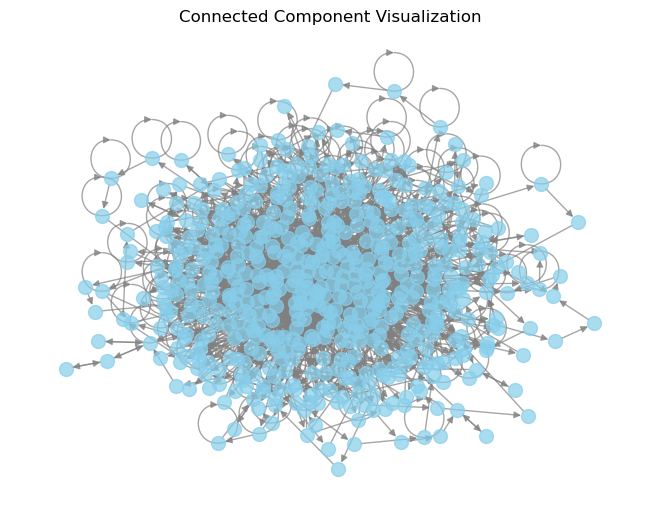

In [15]:
visualize_scc(G, all_scc[0])

In [16]:
all_scc[0]

{3840,
 43763,
 798536,
 896141,
 2030711,
 2200781,
 2723411,
 3586271,
 4004901,
 4107711,
 5022271,
 5404442,
 5686612,
 5763262,
 5867132,
 6450372,
 7184612,
 7864222,
 8467082,
 8632762,
 9026112,
 9078472,
 9571702,
 9717472,
 10446482,
 11336782,
 11471572,
 11582012,
 12071362,
 12263542,
 14095650,
 14096763,
 14101605,
 14123881,
 14182218,
 14196108,
 14285961,
 14334846,
 14379660,
 14562285,
 14592709,
 14654085,
 14723614,
 14814762,
 14855994,
 14931637,
 14935367,
 15043917,
 15226458,
 15250501,
 15281391,
 15446531,
 15567173,
 15672273,
 15809138,
 15863880,
 15950086,
 15985111,
 16076032,
 16106584,
 16598957,
 16783996,
 16861509,
 17250666,
 17351167,
 17702451,
 17881764,
 17888010,
 17925409,
 18189286,
 18213426,
 18266688,
 18269124,
 18300968,
 18359716,
 18378349,
 18555793,
 18686907,
 18719020,
 18839937,
 18856867,
 18946913,
 19062153,
 19079480,
 19224439,
 19546277,
 19721574,
 19748227,
 19951102,
 20169416,
 20178419,
 20374262,
 20648704,
 2065660

In [92]:
node_highest_in_degree, highest_in_degree = max(G.subgraph(all_scc[0]).in_degree(), key=lambda x: x[1])
node_highest_out_degree, highest_out_degree = max(G.subgraph(all_scc[0]).out_degree(), key=lambda x: x[1])
print('in : ', node_highest_in_degree, highest_in_degree)
print('out : ', node_highest_out_degree, highest_out_degree)

in :  4119727762 51
out :  902926941413453824 117


In [94]:
df[df['user.id'] == 4119727762]

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
3682,Fri Nov 11 12:07:42 +0000 2022,"""extrapolate trustless financial system"" -the ...",0,"""extrapolate trustless financial system"" -the ...",NaN,NaN,NaN,1591039965714350080,0,Fri Nov 11 10:31:03 +0000 2022,...,True,NaN,Thu Nov 05 13:43:52 +0000 2015,319,532,False,4119727762,None,None,None
12979,Fri Nov 11 12:18:17 +0000 2022,@calebini if you knew anything about engineeri...,0,@calebini if you knew anything about engineeri...,NaN,NaN,NaN,1591042627012435968,0,NaN,...,True,NaN,Thu Nov 05 13:43:52 +0000 2015,319,532,False,4119727762,None,None,None
15536,Fri Nov 11 12:21:05 +0000 2022,@calebini @based_ajay @hasufl jesus you are st...,0,@calebini @based_ajay @hasufl jesus you are st...,NaN,NaN,NaN,1591043334193442817,0,NaN,...,True,NaN,Thu Nov 05 13:43:52 +0000 2015,319,532,False,4119727762,None,None,None
17557,Fri Nov 11 12:23:29 +0000 2022,NaN,0,@calebini these people continue to prove my th...,NaN,NaN,NaN,1591043936474529793,0,Fri Nov 11 00:55:06 +0000 2022,...,False,NaN,Thu Nov 05 13:43:52 +0000 2015,319,532,False,4119727762,None,None,None
21496,Fri Nov 11 12:27:49 +0000 2022,NaN,0,"@calebini well there's your problem, the cRyPt...",NaN,NaN,NaN,1591045029186785280,0,NaN,...,False,NaN,Thu Nov 05 13:43:52 +0000 2015,319,532,False,4119727762,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83562,Wed Nov 23 15:51:39 +0000 2022,NaN,0,reminds of listening to @IBMBlockchain lead de...,NaN,NaN,NaN,1595444978553159682,0,Wed Nov 23 07:24:19 +0000 2022,...,False,NaN,Thu Nov 05 13:43:52 +0000 2015,399,557,False,4119727762,None,None,None
89801,Wed Nov 23 15:58:44 +0000 2022,"as I said in above tweet, eth diluted its util...",0,"as I said in above tweet, eth diluted its util...",NaN,NaN,NaN,1595446762562637824,0,Wed Nov 23 12:46:31 +0000 2022,...,True,NaN,Thu Nov 05 13:43:52 +0000 2015,399,557,False,4119727762,None,None,None
35618,Wed Nov 23 14:56:25 +0000 2022,is this why Uniswap was compelled to update pr...,0,is this why Uniswap was compelled to update pr...,NaN,NaN,NaN,1595431077967003650,0,Tue Nov 22 15:41:31 +0000 2022,...,True,NaN,Thu Nov 05 13:43:52 +0000 2015,399,557,False,4119727762,None,None,None
78846,Wed Nov 23 18:50:19 +0000 2022,NaN,0,"@concodanomics in the end, cRyPtO is largely a...",NaN,NaN,NaN,1595489941240352768,0,NaN,...,False,NaN,Thu Nov 05 13:43:52 +0000 2015,400,557,False,4119727762,None,None,None


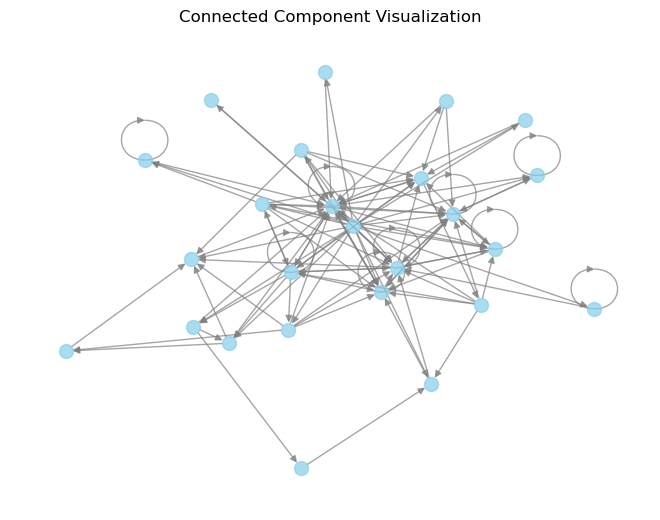

In [18]:
visualize_scc(G, all_scc[1])

In [19]:
all_scc[1]

{825202871427751936,
 912957684852318208,
 1510467423362637824,
 1517168776977915904,
 1517170926651166720,
 1518663117966049280,
 1518981680060461056,
 1518983855730212864,
 1518993327513047040,
 1519152370491437056,
 1520268892345577472,
 1520269534434758656,
 1520812629660372992,
 1521694472479952896,
 1522011986514440192,
 1522506688842010624,
 1522822906023088128,
 1526593404473249792,
 1548336466639884288,
 1548680749213106176,
 1549619001365790720,
 1563756343370035200,
 1563814773254660096,
 1566883966656819200,
 1574611704805150720}

In [99]:
df[df['user.id'] == 1549619001365790720]

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
2165,Wed Nov 09 11:35:11 +0000 2022,@BrijSharma1980 @therahulads @CryptoAdsIndia @...,0,@BrijSharma1980 @therahulads @CryptoAdsIndia @...,NaN,NaN,NaN,1590307008280154112,0,NaN,...,True,NaN,Wed Jul 20 04:56:58 +0000 2022,4,7,True,1549619001365790720,India,NaN,NaN
86963,Mon Nov 21 11:24:00 +0000 2022,"@BrijSharma1980 @TheMoonCarl ""ADS GROUP OF COM...",0,"@BrijSharma1980 @TheMoonCarl ""ADS GROUP OF COM...",NaN,NaN,NaN,1594652846296686592,0,NaN,...,True,NaN,Wed Jul 20 04:56:58 +0000 2022,6,7,True,1549619001365790720,India,NaN,NaN
1501,Mon Nov 21 11:26:57 +0000 2022,#ADSCOIN is the Future of #Crypto World. Comin...,10,#ADSCOIN is the Future of #Crypto World. Comin...,NaN,NaN,NaN,1594653590525644802,2,Sun Nov 20 02:48:53 +0000 2022,...,True,NaN,Wed Jul 20 04:56:58 +0000 2022,8,9,True,1549619001365790720,India,NaN,NaN
35445,Wed Nov 09 11:37:14 +0000 2022,#ADSCOIN is the Future of #Crypto World. Comin...,9,#ADSCOIN is the Future of #Crypto World. Comin...,NaN,NaN,NaN,1590307523361669123,0,Wed Nov 09 06:03:21 +0000 2022,...,True,NaN,Wed Jul 20 04:56:58 +0000 2022,7,8,True,1549619001365790720,India,NaN,NaN
36812,Tue Nov 22 01:35:12 +0000 2022,#ADSCOIN is the Future of #Crypto World. Comin...,6,#ADSCOIN is the Future of #Crypto World. Comin...,NaN,NaN,NaN,1594867056482324480,1,Tue Nov 22 00:57:12 +0000 2022,...,True,NaN,Wed Jul 20 04:56:58 +0000 2022,7,8,True,1549619001365790720,India,NaN,NaN
56369,Tue Nov 22 01:30:46 +0000 2022,#ADSCOIN is the Future of #Crypto World. Comin...,4,#ADSCOIN is the Future of #Crypto World. Comin...,NaN,NaN,NaN,1594865943284690944,0,Tue Nov 22 01:00:34 +0000 2022,...,True,NaN,Wed Jul 20 04:56:58 +0000 2022,7,8,True,1549619001365790720,India,NaN,NaN
6227,Tue Nov 22 01:18:51 +0000 2022,@BrijSharma1980 @therahulads @CryptoAdsIndia @...,0,@BrijSharma1980 @therahulads @CryptoAdsIndia @...,NaN,NaN,NaN,1594862942910308352,0,NaN,...,True,NaN,Wed Jul 20 04:56:58 +0000 2022,7,8,True,1549619001365790720,India,NaN,NaN
9315,Tue Nov 22 01:23:11 +0000 2022,@BrijSharma1980 @therahulads @CryptoAdsIndia @...,0,@BrijSharma1980 @therahulads @CryptoAdsIndia @...,NaN,NaN,NaN,1594864033429323776,0,NaN,...,True,NaN,Wed Jul 20 04:56:58 +0000 2022,7,8,True,1549619001365790720,India,NaN,NaN
11988,Tue Nov 22 01:27:07 +0000 2022,@BrijSharma1980 @therahulads @CryptoAdsIndia @...,0,@BrijSharma1980 @therahulads @CryptoAdsIndia @...,NaN,NaN,NaN,1594865022337167361,0,NaN,...,True,NaN,Wed Jul 20 04:56:58 +0000 2022,7,8,True,1549619001365790720,India,NaN,NaN
13011,Tue Nov 22 01:20:33 +0000 2022,#ADSCOIN is the Future of #Crypto World. Comin...,2,#ADSCOIN is the Future of #Crypto World. Comin...,NaN,NaN,NaN,1594863369785597952,0,Tue Nov 22 01:02:49 +0000 2022,...,True,NaN,Wed Jul 20 04:56:58 +0000 2022,7,8,True,1549619001365790720,India,NaN,NaN


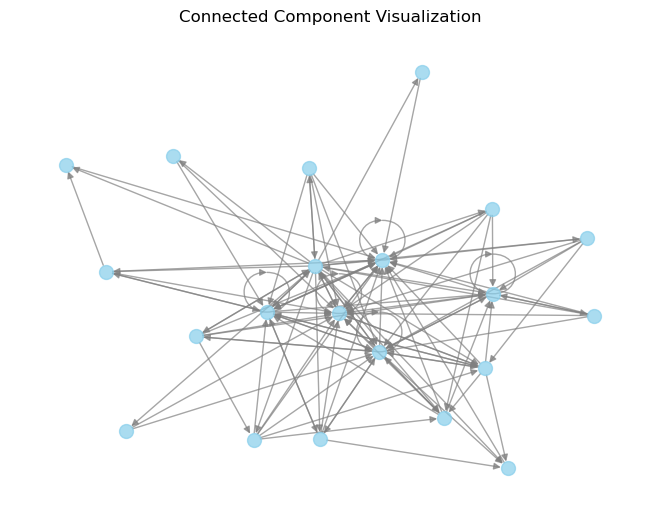

In [21]:
visualize_scc(G, all_scc[2])

In [22]:
all_scc[2]

{132146668,
 302686882,
 407861358,
 1373794038,
 2366663978,
 2539284575,
 2884498638,
 3196973563,
 3247613569,
 3346348648,
 4921730335,
 706347814960259072,
 876757408038572032,
 950621345544482816,
 1236599199103201280,
 1536572639321661440,
 1568207259628638208,
 1578441484923199488,
 1582049279023415296,
 1588568332160012288,
 1592585215859650560}

In [23]:
df[df['user.id'] == 950621345544482816]

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
807,Sun Nov 20 16:12:37 +0000 2022,#SaveKashmiriHindus PM Package Employee’s \nTi...,3,#SaveKashmiriHindus PM Package Employee’s \nTi...,NaN,NaN,NaN,1594363093487755264,2,Sun Nov 20 09:29:29 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,70,185,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
33878,Sun Nov 20 16:10:06 +0000 2022,#SaveKashmiriHindus PM Package Employee’s \nTi...,0,#SaveKashmiriHindus PM Package Employee’s \nTi...,NaN,NaN,NaN,1594362459166371840,0,Sat Nov 19 14:11:20 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,70,185,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
45047,Sun Nov 20 17:24:42 +0000 2022,#SaveKashmiriHindus PM Package Employee’s \nTi...,0,#SaveKashmiriHindus PM Package Employee’s \nTi...,NaN,NaN,NaN,1594381230992404481,0,Sat Nov 19 05:32:30 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,70,185,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
57334,Sun Nov 20 16:11:08 +0000 2022,#SaveKashmiriHindus PM Package Employee’s \nTi...,3,#SaveKashmiriHindus PM Package Employee’s \nTi...,NaN,NaN,NaN,1594362720010526721,2,Sun Nov 20 03:40:33 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,70,185,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
66984,Sun Nov 20 06:01:59 +0000 2022,#SaveKashmiriHindus PM Package Employee’s \nTi...,3,#SaveKashmiriHindus PM Package Employee’s \nTi...,NaN,NaN,NaN,1594209420845932554,4,Sun Nov 20 02:50:32 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,70,184,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92791,Wed Nov 23 13:07:28 +0000 2022,@BJP4JnK @ImRavinderRaina #SaveKashmiriHindus ...,2,@BJP4JnK @ImRavinderRaina #SaveKashmiriHindus ...,NaN,NaN,NaN,1595403661433139200,1,NaN,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,69,185,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
52196,Wed Nov 23 13:07:20 +0000 2022,#SaveKashmiriHindus PM Package Employee’s \nTi...,1,#SaveKashmiriHindus PM Package Employee’s \nTi...,NaN,NaN,NaN,1595403627937599488,0,Wed Nov 23 12:04:59 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,69,185,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
20911,Wed Nov 23 14:39:24 +0000 2022,"@ImRavinderRaina ji ap aage bhado, hum pm pack...",0,"@ImRavinderRaina ji ap aage bhado, hum pm pack...",NaN,NaN,NaN,1595426794366455809,0,Tue Nov 22 15:32:47 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,69,184,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
25579,Tue Nov 22 18:02:29 +0000 2022,#SaveKashmiriHindus PM Package Employee’s \nTi...,8,#SaveKashmiriHindus PM Package Employee’s \nTi...,NaN,NaN,NaN,1595115515433082882,2,Tue Nov 22 15:27:06 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,69,183,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN


In [114]:
node_highest_in_degree, highest_in_degree = max(G.subgraph(all_scc[3]).in_degree(), key=lambda x: x[1])
node_highest_out_degree, highest_out_degree = max(G.subgraph(all_scc[3]).out_degree(), key=lambda x: x[1])
print('in : ', node_highest_in_degree, highest_in_degree)
print('out : ', node_highest_out_degree, highest_out_degree)

in :  5533262 5
out :  25570572 4


In [117]:
df[df['user.id'] == 5533262]

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
46262,Fri Nov 11 11:22:11 +0000 2022,"@TravellerNow @sedane94 @binance can, but woul...",0,"@TravellerNow @sedane94 @binance can, but woul...",NaN,NaN,NaN,1591028509195251712,0,NaN,...,True,NaN,Thu Apr 26 17:04:58 +0000 2007,11697,5479,True,5533262,"Hanoi, Vietnam",NaN,NaN
49540,Fri Nov 11 07:55:40 +0000 2022,NaN,6,Noticing good stuff from cosmos news.,NaN,NaN,NaN,1590976539151433728,0,Thu Nov 10 20:08:07 +0000 2022,...,False,NaN,Thu Apr 26 17:04:58 +0000 2007,11697,5479,True,5533262,"Hanoi, Vietnam",NaN,NaN
64434,Fri Nov 11 06:39:55 +0000 2022,NaN,0,Install the electric fence around cosmos and I...,NaN,NaN,NaN,1590957477574905857,0,NaN,...,False,NaN,Thu Apr 26 17:04:58 +0000 2007,11701,5479,True,5533262,"Hanoi, Vietnam",NaN,NaN
28478,Wed Nov 09 21:24:51 +0000 2022,@danhwang88 Improve cosmos by distributing inf...,0,@danhwang88 Improve cosmos by distributing inf...,NaN,NaN,NaN,1590455400306192385,0,Wed Nov 09 19:25:14 +0000 2022,...,True,NaN,Thu Apr 26 17:04:58 +0000 2007,11699,5461,True,5533262,"Hanoi, Vietnam",NaN,NaN
92692,Wed Nov 09 19:29:23 +0000 2022,NaN,0,this was posted in the cosmos hub public chat....,NaN,NaN,NaN,1590426342696574977,0,NaN,...,False,NaN,Thu Apr 26 17:04:58 +0000 2007,11701,5461,True,5533262,"Hanoi, Vietnam",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32471,Tue Nov 22 08:30:53 +0000 2022,This is incredibly good information on decentr...,0,This is incredibly good information on decentr...,NaN,NaN,NaN,1594971667167850498,0,Tue Nov 22 06:04:14 +0000 2022,...,True,NaN,Thu Apr 26 17:04:58 +0000 2007,12063,5515,True,5533262,"Hanoi, Vietnam",NaN,NaN
17273,Tue Nov 22 05:06:53 +0000 2022,our team missed an osmosis upgrade.\n\nas a va...,0,our team missed an osmosis upgrade.\n\nas a va...,NaN,NaN,NaN,1594920329285365763,0,NaN,...,True,NaN,Thu Apr 26 17:04:58 +0000 2007,12059,5514,True,5533262,"Hanoi, Vietnam",NaN,NaN
39397,Wed Nov 23 12:22:59 +0000 2022,NaN,5,The Cosmos Hub community is unique in that you...,NaN,NaN,NaN,1595392466139897862,0,NaN,...,False,NaN,Thu Apr 26 17:04:58 +0000 2007,12024,5519,True,5533262,"Hanoi, Vietnam",NaN,NaN
65515,Wed Nov 23 14:03:12 +0000 2022,I think more validators should be working on t...,2,I think more validators should be working on t...,NaN,NaN,NaN,1595417684425920512,0,NaN,...,True,NaN,Thu Apr 26 17:04:58 +0000 2007,12048,5519,True,5533262,"Hanoi, Vietnam",NaN,NaN


In [122]:
all_scc[4]

{1153658704782397440,
 1413674305636950016,
 1480208511342571520,
 1565046338915815424,
 1585791768808681472,
 1588364611191029760,
 1589535471792574464}

In [118]:
node_highest_in_degree, highest_in_degree = max(G.subgraph(all_scc[4]).in_degree(), key=lambda x: x[1])
node_highest_out_degree, highest_out_degree = max(G.subgraph(all_scc[4]).out_degree(), key=lambda x: x[1])
print('in : ', node_highest_in_degree, highest_in_degree)
print('out : ', node_highest_out_degree, highest_out_degree)

in :  1585791768808681472 5
out :  1585791768808681472 5


In [124]:
df[df['user.id'] == 1589535471792574464]

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
49115,Sat Nov 12 09:20:26 +0000 2022,NaN,0,"""Not just any, ""dog"" a... \n\nDrum roll please...",NaN,NaN,NaN,1591360258043424769,0,Sat Nov 12 09:18:42 +0000 2022,...,False,NaN,Mon Nov 07 08:29:38 +0000 2022,118,201,False,1589535471792574464,Night City,NaN,NaN
55709,Sat Nov 12 09:32:30 +0000 2022,NaN,0,combat settings installed. But once it does an...,NaN,NaN,NaN,1591363297068322816,0,NaN,...,False,NaN,Mon Nov 07 08:29:38 +0000 2022,118,201,False,1589535471792574464,Night City,NaN,NaN
78336,Sat Nov 12 01:11:39 +0000 2022,NaN,0,I think I'm a pretty bad guy myself but even I...,NaN,NaN,NaN,1591237254441472000,0,Sat Nov 12 01:10:36 +0000 2022,...,False,NaN,Mon Nov 07 08:29:38 +0000 2022,116,196,False,1589535471792574464,Night City,NaN,NaN
17611,Thu Nov 17 06:46:51 +0000 2022,"""I've got a lot of names, actually. But hey, t...",0,"""I've got a lot of names, actually. But hey, t...",NaN,NaN,NaN,1593133548982407168,0,Thu Nov 17 06:27:51 +0000 2022,...,True,NaN,Mon Nov 07 08:29:38 +0000 2022,149,236,False,1589535471792574464,Night City,NaN,NaN


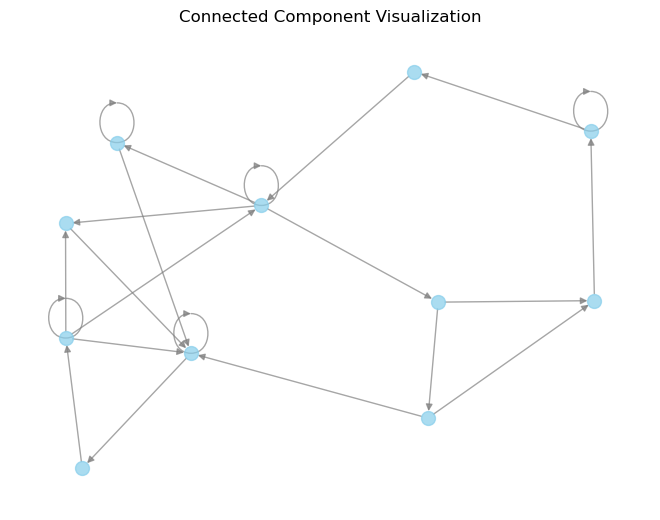

In [24]:
visualize_scc(G, all_scc[3])

In [25]:
all_scc[3]

{5533262,
 6068692,
 7910872,
 25570572,
 85636440,
 372650546,
 931179333607215104,
 1051710088098996224,
 1117689210566316032,
 1314846469128585216,
 1471733556989018112}

In [26]:
df[df['user.id'] == 5533262]

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
46262,Fri Nov 11 11:22:11 +0000 2022,"@TravellerNow @sedane94 @binance can, but woul...",0,"@TravellerNow @sedane94 @binance can, but woul...",NaN,NaN,NaN,1591028509195251712,0,NaN,...,True,NaN,Thu Apr 26 17:04:58 +0000 2007,11697,5479,True,5533262,"Hanoi, Vietnam",NaN,NaN
49540,Fri Nov 11 07:55:40 +0000 2022,NaN,6,Noticing good stuff from cosmos news.,NaN,NaN,NaN,1590976539151433728,0,Thu Nov 10 20:08:07 +0000 2022,...,False,NaN,Thu Apr 26 17:04:58 +0000 2007,11697,5479,True,5533262,"Hanoi, Vietnam",NaN,NaN
64434,Fri Nov 11 06:39:55 +0000 2022,NaN,0,Install the electric fence around cosmos and I...,NaN,NaN,NaN,1590957477574905857,0,NaN,...,False,NaN,Thu Apr 26 17:04:58 +0000 2007,11701,5479,True,5533262,"Hanoi, Vietnam",NaN,NaN
28478,Wed Nov 09 21:24:51 +0000 2022,@danhwang88 Improve cosmos by distributing inf...,0,@danhwang88 Improve cosmos by distributing inf...,NaN,NaN,NaN,1590455400306192385,0,Wed Nov 09 19:25:14 +0000 2022,...,True,NaN,Thu Apr 26 17:04:58 +0000 2007,11699,5461,True,5533262,"Hanoi, Vietnam",NaN,NaN
92692,Wed Nov 09 19:29:23 +0000 2022,NaN,0,this was posted in the cosmos hub public chat....,NaN,NaN,NaN,1590426342696574977,0,NaN,...,False,NaN,Thu Apr 26 17:04:58 +0000 2007,11701,5461,True,5533262,"Hanoi, Vietnam",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32471,Tue Nov 22 08:30:53 +0000 2022,This is incredibly good information on decentr...,0,This is incredibly good information on decentr...,NaN,NaN,NaN,1594971667167850498,0,Tue Nov 22 06:04:14 +0000 2022,...,True,NaN,Thu Apr 26 17:04:58 +0000 2007,12063,5515,True,5533262,"Hanoi, Vietnam",NaN,NaN
17273,Tue Nov 22 05:06:53 +0000 2022,our team missed an osmosis upgrade.\n\nas a va...,0,our team missed an osmosis upgrade.\n\nas a va...,NaN,NaN,NaN,1594920329285365763,0,NaN,...,True,NaN,Thu Apr 26 17:04:58 +0000 2007,12059,5514,True,5533262,"Hanoi, Vietnam",NaN,NaN
39397,Wed Nov 23 12:22:59 +0000 2022,NaN,5,The Cosmos Hub community is unique in that you...,NaN,NaN,NaN,1595392466139897862,0,NaN,...,False,NaN,Thu Apr 26 17:04:58 +0000 2007,12024,5519,True,5533262,"Hanoi, Vietnam",NaN,NaN
65515,Wed Nov 23 14:03:12 +0000 2022,I think more validators should be working on t...,2,I think more validators should be working on t...,NaN,NaN,NaN,1595417684425920512,0,NaN,...,True,NaN,Thu Apr 26 17:04:58 +0000 2007,12048,5519,True,5533262,"Hanoi, Vietnam",NaN,NaN


In [27]:
all_scc[4]

{1153658704782397440,
 1413674305636950016,
 1480208511342571520,
 1565046338915815424,
 1585791768808681472,
 1588364611191029760,
 1589535471792574464}

In [28]:
df[df['user.id'] == 1589535471792574464]

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
49115,Sat Nov 12 09:20:26 +0000 2022,NaN,0,"""Not just any, ""dog"" a... \n\nDrum roll please...",NaN,NaN,NaN,1591360258043424769,0,Sat Nov 12 09:18:42 +0000 2022,...,False,NaN,Mon Nov 07 08:29:38 +0000 2022,118,201,False,1589535471792574464,Night City,NaN,NaN
55709,Sat Nov 12 09:32:30 +0000 2022,NaN,0,combat settings installed. But once it does an...,NaN,NaN,NaN,1591363297068322816,0,NaN,...,False,NaN,Mon Nov 07 08:29:38 +0000 2022,118,201,False,1589535471792574464,Night City,NaN,NaN
78336,Sat Nov 12 01:11:39 +0000 2022,NaN,0,I think I'm a pretty bad guy myself but even I...,NaN,NaN,NaN,1591237254441472000,0,Sat Nov 12 01:10:36 +0000 2022,...,False,NaN,Mon Nov 07 08:29:38 +0000 2022,116,196,False,1589535471792574464,Night City,NaN,NaN
17611,Thu Nov 17 06:46:51 +0000 2022,"""I've got a lot of names, actually. But hey, t...",0,"""I've got a lot of names, actually. But hey, t...",NaN,NaN,NaN,1593133548982407168,0,Thu Nov 17 06:27:51 +0000 2022,...,True,NaN,Mon Nov 07 08:29:38 +0000 2022,149,236,False,1589535471792574464,Night City,NaN,NaN


In [30]:
curr_scc = all_scc[0]
start_node = list(curr_scc)[0]

reachable_nodes = nx.single_source_shortest_path_length(G, start_node)
non_scc_reachable_nodes = {node: distance for node, distance in reachable_nodes.items() if node not in curr_scc}
sorted_reachable_nodes = sorted(non_scc_reachable_nodes.items(), key=lambda x: x[1], reverse=True)

print(len(sorted_reachable_nodes)),
print(sorted_reachable_nodes[0:10])

60245
[(1525370781743558656, 15), (1525382365434253312, 15), (1553801954874331139, 15), (1522919316953260032, 15), (1583869360392773633, 15), (1489896283116503047, 15), (1030459668, 15), (1586175440905211905, 15), (1585103627173056512, 15), (1507962802979618825, 15)]


In [31]:
curr_scc = all_scc[1]
start_node = list(curr_scc)[0]

reachable_nodes = nx.single_source_shortest_path_length(G, start_node)
non_scc_reachable_nodes = {node: distance for node, distance in reachable_nodes.items() if node not in curr_scc}
sorted_reachable_nodes = sorted(non_scc_reachable_nodes.items(), key=lambda x: x[1], reverse=True)

print(len(sorted_reachable_nodes)),
print(sorted_reachable_nodes[0:10])

105
[(1568759581802909702, 3), (1571734799404105729, 3), (1573975927008083968, 3), (1542445423541067779, 3), (1319198305612566530, 3), (1217686721078259713, 3), (1560059622895267840, 3), (1567479414350397444, 3), (1518840321597075457, 2), (1571002006080462848, 2)]


In [32]:
df[df['user.id'] == 1571002006080462848]

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
15375,Fri Nov 11 08:35:16 +0000 2022,#ADSCOIN is the Future of #Crypto World. Comin...,1,#ADSCOIN is the Future of #Crypto World. Comin...,NaN,NaN,NaN,1590986504297648130,0,Thu Nov 10 09:31:41 +0000 2022,...,True,NaN,Sat Sep 17 05:07:10 +0000 2022,19,27,True,1571002006080462848,None,None,None
16015,Fri Nov 11 08:38:47 +0000 2022,#ADSCOIN is the Future of #Crypto World. Comin...,1,#ADSCOIN is the Future of #Crypto World. Comin...,NaN,NaN,NaN,1590987390914813953,0,Thu Nov 10 05:58:11 +0000 2022,...,True,NaN,Sat Sep 17 05:07:10 +0000 2022,19,27,True,1571002006080462848,None,None,None
16331,Fri Nov 11 08:39:39 +0000 2022,#ADSCOIN is the Future of #Crypto World. Comin...,0,#ADSCOIN is the Future of #Crypto World. Comin...,NaN,NaN,NaN,1590987607827427330,0,Thu Nov 10 09:24:26 +0000 2022,...,True,NaN,Sat Sep 17 05:07:10 +0000 2022,19,27,True,1571002006080462848,None,None,None
96343,Wed Nov 09 07:28:32 +0000 2022,@NathuniSingh12 @therahulads @BrijSharma1980 @...,3,@NathuniSingh12 @therahulads @BrijSharma1980 @...,NaN,NaN,NaN,1590244933981855746,0,NaN,...,True,NaN,Sat Sep 17 05:07:10 +0000 2022,19,27,True,1571002006080462848,None,None,None
96634,Wed Nov 09 07:24:17 +0000 2022,@NathuniSingh12 @therahulads @BrijSharma1980 @...,3,@NathuniSingh12 @therahulads @BrijSharma1980 @...,NaN,NaN,NaN,1590243864065236992,0,NaN,...,True,NaN,Sat Sep 17 05:07:10 +0000 2022,19,27,True,1571002006080462848,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26571,Tue Nov 22 11:27:04 +0000 2022,#ADSCOIN is the Future of #Crypto World. Comin...,1,#ADSCOIN is the Future of #Crypto World. Comin...,NaN,NaN,NaN,1595016006216605696,0,Mon Nov 21 20:02:17 +0000 2022,...,True,NaN,Sat Sep 17 05:07:10 +0000 2022,17,19,True,1571002006080462848,None,None,None
70598,Tue Nov 22 03:21:51 +0000 2022,#ADSCOIN is the Future of #Crypto World. Comin...,1,#ADSCOIN is the Future of #Crypto World. Comin...,NaN,NaN,NaN,1594893898958397440,0,Tue Nov 22 00:42:20 +0000 2022,...,True,NaN,Sat Sep 17 05:07:10 +0000 2022,17,19,True,1571002006080462848,None,None,None
70633,Tue Nov 22 03:22:56 +0000 2022,#ADSCOIN is the Future of #Crypto World. Comin...,1,#ADSCOIN is the Future of #Crypto World. Comin...,NaN,NaN,NaN,1594894168102694913,0,Tue Nov 22 00:35:35 +0000 2022,...,True,NaN,Sat Sep 17 05:07:10 +0000 2022,17,19,True,1571002006080462848,None,None,None
72167,Tue Nov 22 07:46:27 +0000 2022,#ADSCOIN is the Future of #Crypto World. Comin...,1,#ADSCOIN is the Future of #Crypto World. Comin...,NaN,NaN,NaN,1594960488211034112,0,Tue Nov 22 00:34:47 +0000 2022,...,True,NaN,Sat Sep 17 05:07:10 +0000 2022,17,19,True,1571002006080462848,None,None,None


In [33]:
curr_scc = all_scc[2]
start_node = list(curr_scc)[0]

reachable_nodes = nx.single_source_shortest_path_length(G, start_node)
non_scc_reachable_nodes = {node: distance for node, distance in reachable_nodes.items() if node not in curr_scc}
sorted_reachable_nodes = sorted(non_scc_reachable_nodes.items(), key=lambda x: x[1], reverse=True)

print(len(sorted_reachable_nodes)),
print(sorted_reachable_nodes[0:10])

28
[(1591072188295258114, 6), (1520176072985247745, 5), (1176898458588012544, 5), (1310692223877623808, 5), (1514489571542994947, 4), (1591658154449829890, 4), (1593328244140433408, 4), (1487669652201218055, 3), (1568530209770737664, 3), (1237400987762962433, 3)]


In [125]:
curr_scc = all_scc[3]
start_node = list(curr_scc)[0]

reachable_nodes = nx.single_source_shortest_path_length(G, start_node)
non_scc_reachable_nodes = {node: distance for node, distance in reachable_nodes.items() if node not in curr_scc}
sorted_reachable_nodes = sorted(non_scc_reachable_nodes.items(), key=lambda x: x[1], reverse=True)

print(len(sorted_reachable_nodes)),
print(sorted_reachable_nodes[0:10])

358
[(1435787974466211844, 7), (1450729790869286916, 7), (1541376485654777860, 7), (1571872183512887296, 6), (1589962201292591104, 6), (1584879629718155264, 6), (1585181861634256896, 6), (48102922, 6), (1455677956593012743, 6), (806633874499350528, 6)]


In [126]:
curr_scc = all_scc[4]
start_node = list(curr_scc)[0]

reachable_nodes = nx.single_source_shortest_path_length(G, start_node)
non_scc_reachable_nodes = {node: distance for node, distance in reachable_nodes.items() if node not in curr_scc}
sorted_reachable_nodes = sorted(non_scc_reachable_nodes.items(), key=lambda x: x[1], reverse=True)

print(len(sorted_reachable_nodes)),
print(sorted_reachable_nodes[0:10])

4
[(1193668700412481537, 1), (1591477116478144513, 1), (1586525915282112513, 1), (1591456452396437507, 1)]


In [34]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from wordcloud import WordCloud
from sklearn.cluster import KMeans


def clean_text(text):
    stop_words = set(stopwords.words('english'))
    custom_stopwords = set(['amp', 'rt', 'via', '...', '...', '’', '—', '“', '”', '‘', '’', '...', '``', "''", '️', '...'])
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[@#]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words and word not in custom_stopwords]
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

def get_tfidf(df, scc):
    nltk.download('stopwords')
    
    user_ids_in_scc = [node for node in scc]
    full_texts_in_scc = list(df[df['user.id'].isin(user_ids_in_scc)]['full_text'])
    cleaned_texts = [clean_text(text) for text in full_texts_in_scc]
    
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(cleaned_texts)
    feature_names = vectorizer.get_feature_names_out()

    return tfidf_matrix, feature_names


def get_top_k_words_from_scc(df, scc, k=50, barplot=False, wordcloud=True):

    tfidf_matrix, feature_names = get_tfidf(df, scc)
    term_sum = tfidf_matrix.sum(axis=0)
    term_df = pd.DataFrame({'term': feature_names, 'tfidf_sum': term_sum.tolist()[0]})
    term_df_sorted = term_df.sort_values(by='tfidf_sum', ascending=False)
    top_keywords = term_df_sorted.head(k)['term'].tolist()

    if(barplot):
        plt.figure(figsize=(12, 6))
        plt.bar(top_keywords, term_df_sorted.head(k)['tfidf_sum'], color='skyblue')
        plt.xticks(rotation=90, ha='right')
        plt.xlabel('Keywords')
        plt.ylabel('TF-IDF Sum')
        plt.title('Top' + str(k) + ' Keywords by TF-IDF Sum')
        plt.tight_layout()
        plt.show()
    
    if(wordcloud):
        
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_df_sorted.set_index('term')['tfidf_sum'][0:k].to_dict())
    
        plt.figure(figsize=(10, 5))
        plt.title('Top' + str(k) + ' Keywords by TF-IDF Sum')
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
    
    return top_keywords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mridul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


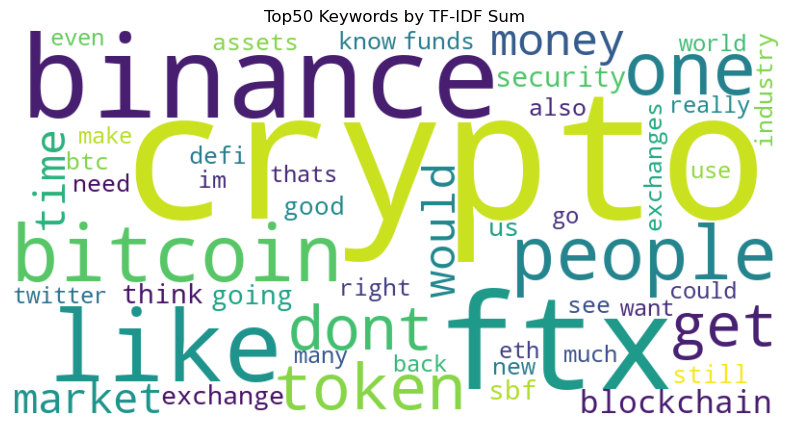

In [35]:
top_keywpords = get_top_k_words_from_scc(df, all_scc[0], k=50, barplot=False, wordcloud=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mridul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


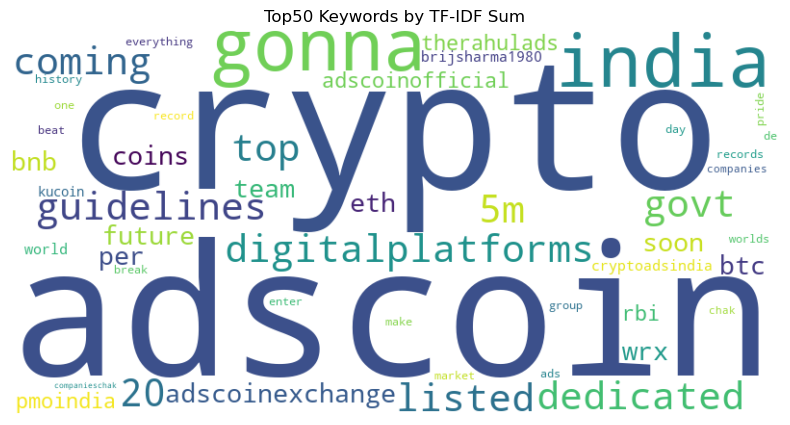

In [36]:
top_keywpords = get_top_k_words_from_scc(df, all_scc[1], k=50, barplot=False, wordcloud=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mridul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_26607/1646263504.py:51: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  plt.tight_layout()
/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_26607/1646263504.py:51: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_26607/1646263504.py:51: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  plt.tight_layout()
/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_26607/1646263504.py:51: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from current font.
  plt.tight_layout()
/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_26607/1646263504.py:51: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) m

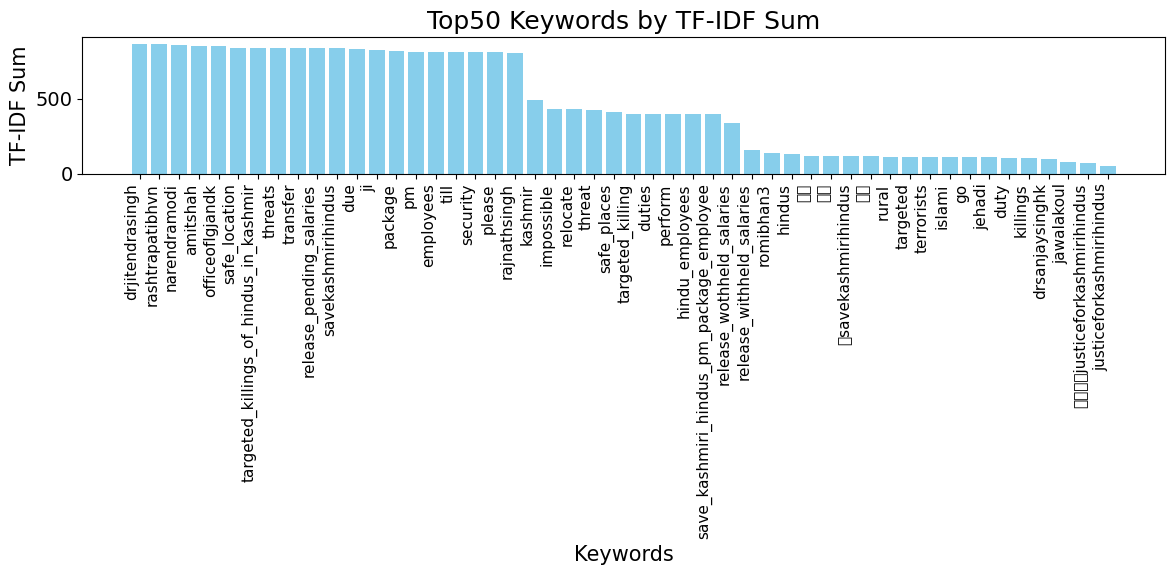

In [95]:
top_keywpords = get_top_k_words_from_scc(df, all_scc[2], k=50, barplot=True, wordcloud=False)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mridul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


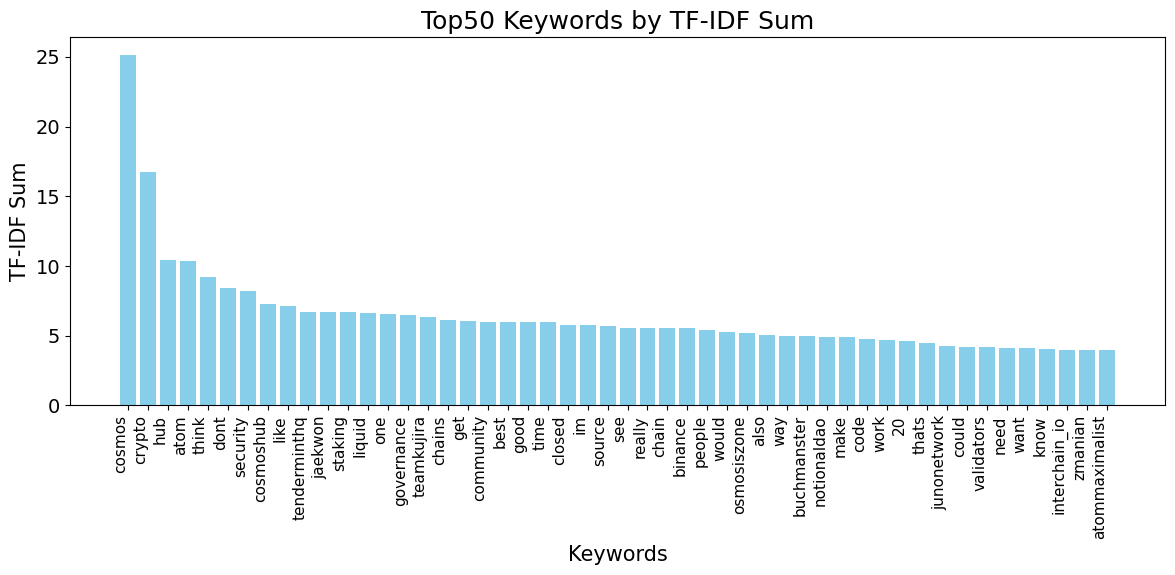

In [96]:
top_keywpords = get_top_k_words_from_scc(df, all_scc[3], k=50, barplot=True, wordcloud=False)

In [37]:

original_engagement = df[['favorite_count', 'retweet_count']].loc[df['quoted_status.id'].isnull()]
quoted_engagement = df[['quoted_status.favorite_count', 'quoted_status.retweet_count']].dropna()

avg_original_favorite = original_engagement['favorite_count'].mean()
avg_original_retweet = original_engagement['retweet_count'].mean()
avg_quoted_favorite = quoted_engagement['quoted_status.favorite_count'].mean()
avg_quoted_retweet = quoted_engagement['quoted_status.retweet_count'].mean()

print(f"Average favorites for original tweets: {avg_quoted_favorite:.2f}")
print(f"Average favorites for quotes: {avg_original_favorite:.2f}")
print("")
print(f"Average retweets for original tweets: {avg_quoted_retweet:.2f}")
print(f"Average retweets for quotes: {avg_original_retweet:.2f}")


Average favorites for original tweets: 2145.37
Average favorites for quotes: 4.89

Average retweets for original tweets: 502.87
Average retweets for quotes: 1.48


In [38]:
df_network = df[['created_at', 'user.id', 'quoted_status.user.id']].copy()
df_network['created_at'] = pd.to_datetime(df_network['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
df_network.sort_values(by='created_at', inplace=True)

In [102]:
def get_friends_followers_stat(scc, plot_title):
    # Extract friends and followers counts for users in all_scc[0]
    scc_users = df[df['user.id'].isin(scc) | df['quoted_status.user.id'].isin(scc)]
    scc_friends_followers = scc_users[['user.friends_count', 'user.followers_count']]

    start_node = list(scc)[0]

    reachable_nodes = nx.single_source_shortest_path_length(G, start_node)
    non_scc_reachable_nodes = {node: distance for node, distance in reachable_nodes.items() if node not in scc}
    
    reachable_users = df[df['user.id'].isin(non_scc_reachable_nodes) | df['quoted_status.user.id'].isin(non_scc_reachable_nodes)]
    reachable_friends_followers = reachable_users[['user.friends_count', 'user.followers_count']]
    
    scc_stats = {
        'Mean Friends': round(np.mean(scc_friends_followers['user.friends_count'])),
        'Median Friends': round(np.median(scc_friends_followers['user.friends_count'])),
        'Mean Followers': round(np.mean(scc_friends_followers['user.followers_count'])),
        'Median Followers': round(np.median(scc_friends_followers['user.followers_count']))
    }
    
    reachable_stats = {
        'Mean Friends': round(np.mean(reachable_friends_followers['user.friends_count'])),
        'Median Friends': round(np.median(reachable_friends_followers['user.friends_count'])),
        'Mean Followers': round(np.mean(reachable_friends_followers['user.followers_count'])),
        'Median Followers': round(np.median(reachable_friends_followers['user.followers_count']))
    }

    
    labels = list(scc_stats.keys())
    scc_values = list(scc_stats.values())
    reachable_values = list(reachable_stats.values())
    
    bar_width = 0.35
    index = np.arange(len(labels))

    plt.rc('font', size=18)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    
    fig, ax = plt.subplots(figsize=(14, 9))
    
    bar1 = ax.bar(index, scc_values, bar_width, label='Within SCC', color='tab:blue')
    bar2 = ax.bar(index + bar_width, reachable_values, bar_width, label='Reachable from SCC', color='tab:orange')
    
    # ax.set_xlabel('Metrics')
    ax.set_ylabel('Counts')
    ax.set_title(plot_title, fontsize=20)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(labels)
    ax.legend()
    
    for bar, value in zip(bar1 + bar2, scc_values + reachable_values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}', ha='center', va='bottom')
        
    plt.savefig("figures/"+plot_title.replace(" ", "_").lower()+"_fnf_stat.pdf", format="pdf", bbox_inches='tight')

    plt.show()


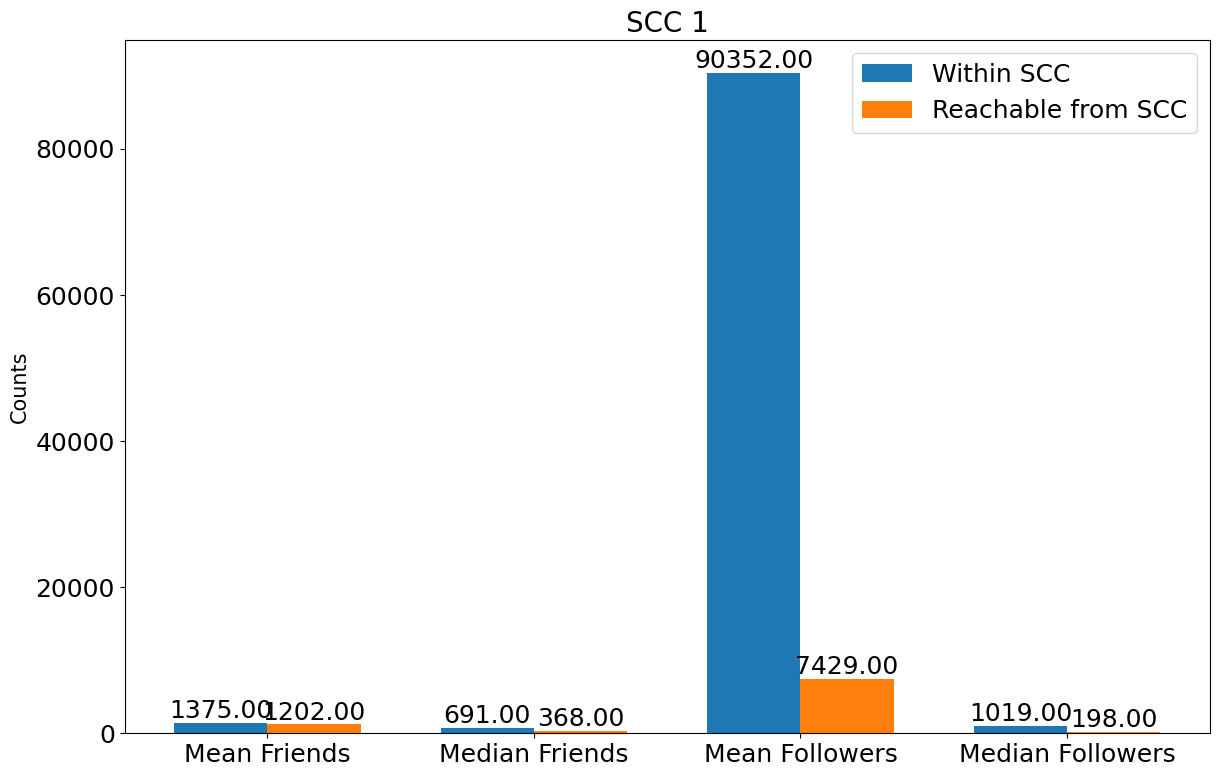

In [103]:
get_friends_followers_stat(all_scc[0], "SCC 1")

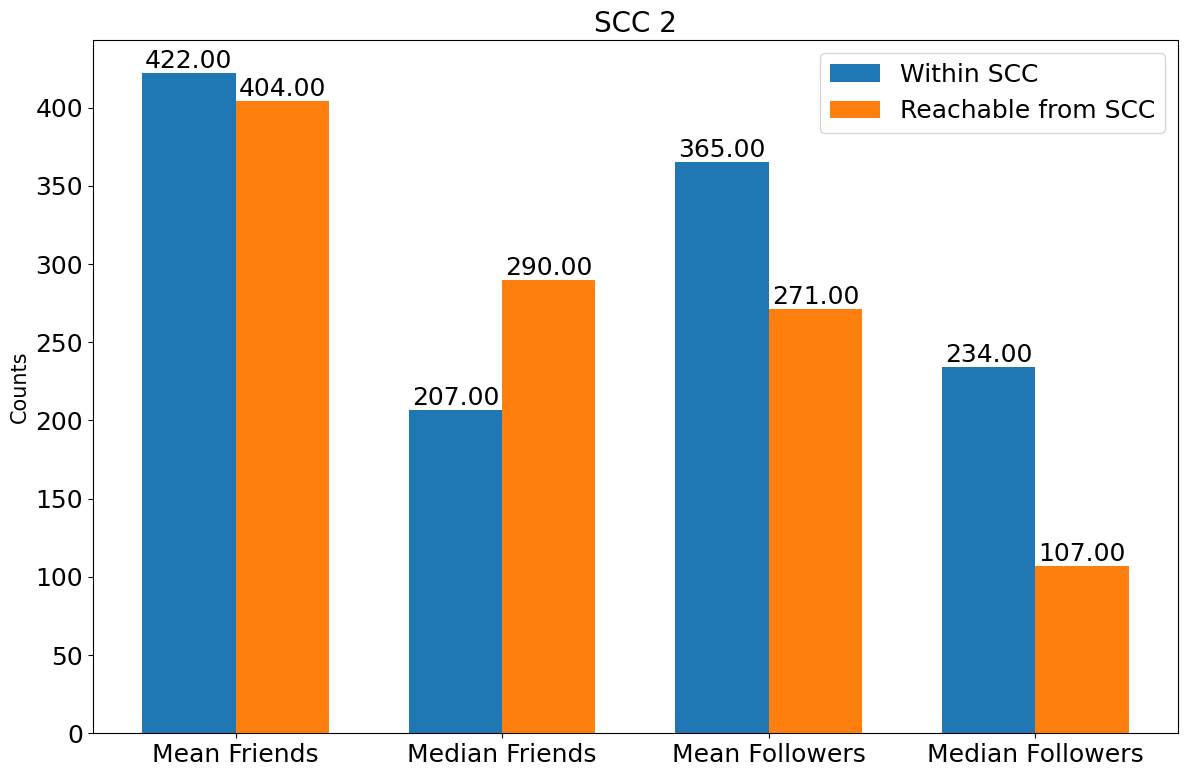

KeyboardInterrupt: 

In [104]:
get_friends_followers_stat(all_scc[1], "SCC 2")

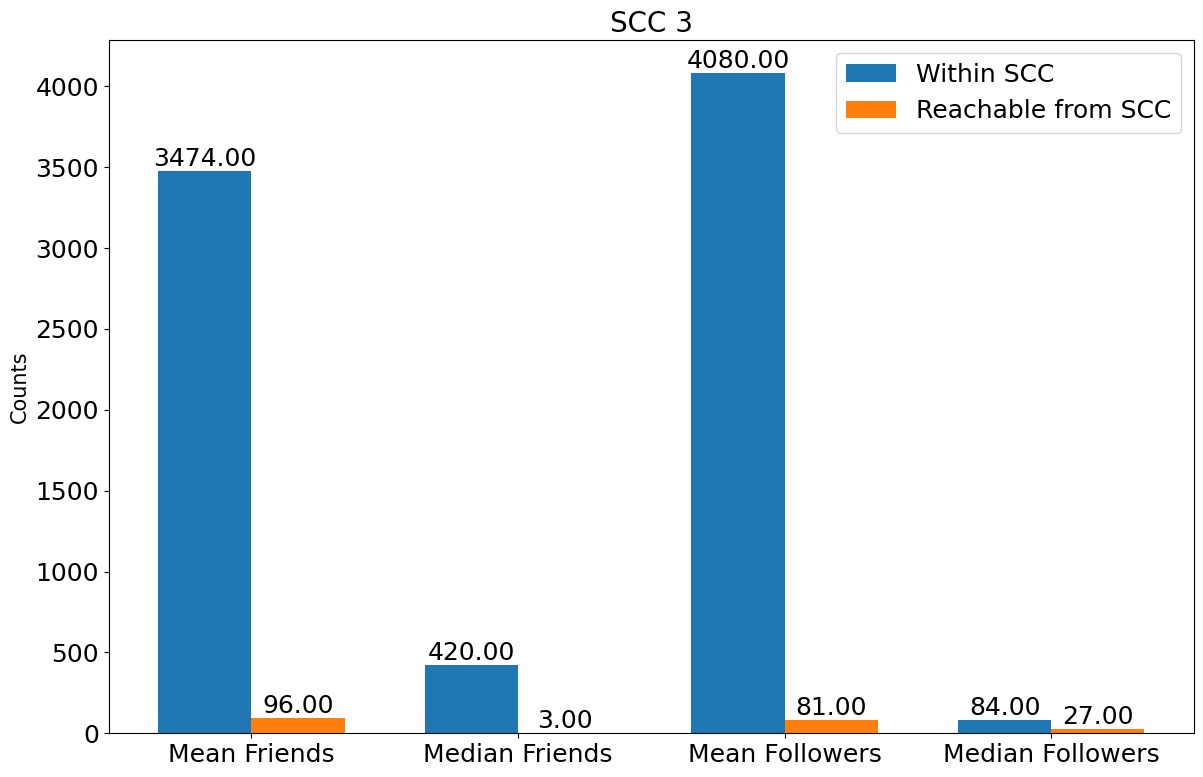

In [105]:
get_friends_followers_stat(all_scc[2], "SCC 3")

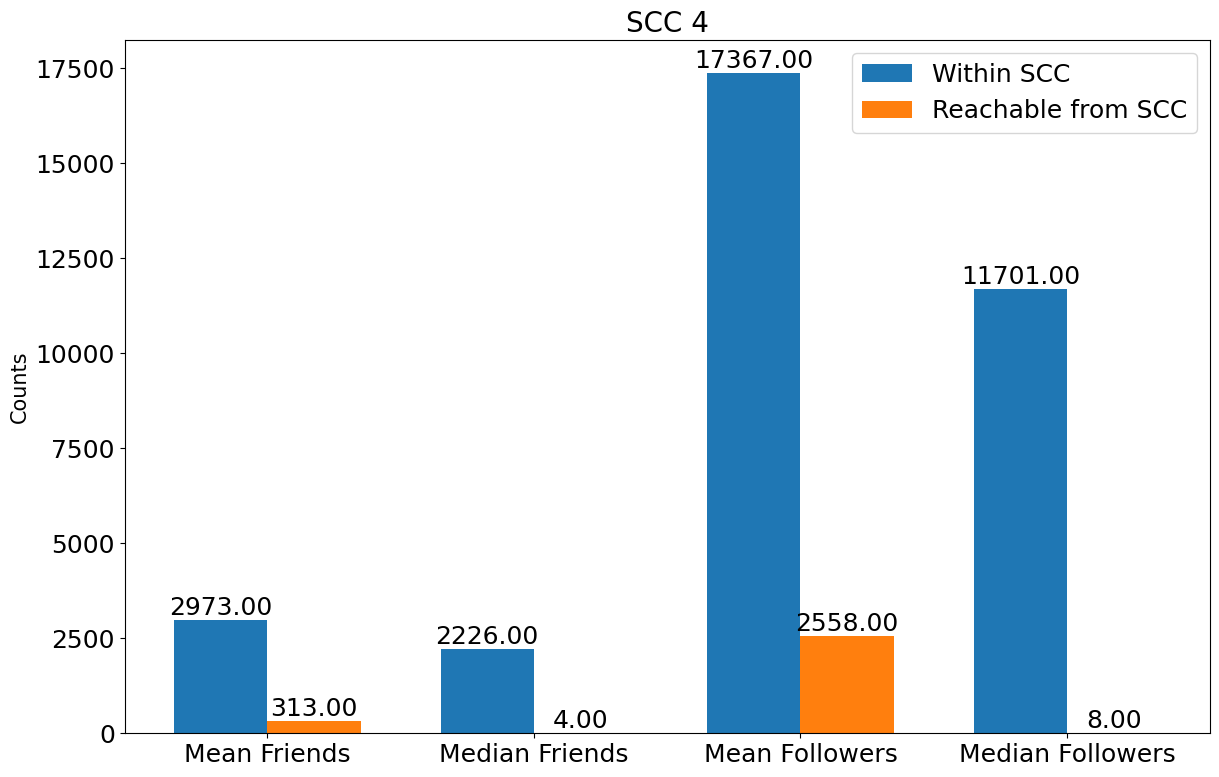

In [106]:
get_friends_followers_stat(all_scc[3], "SCC 4")

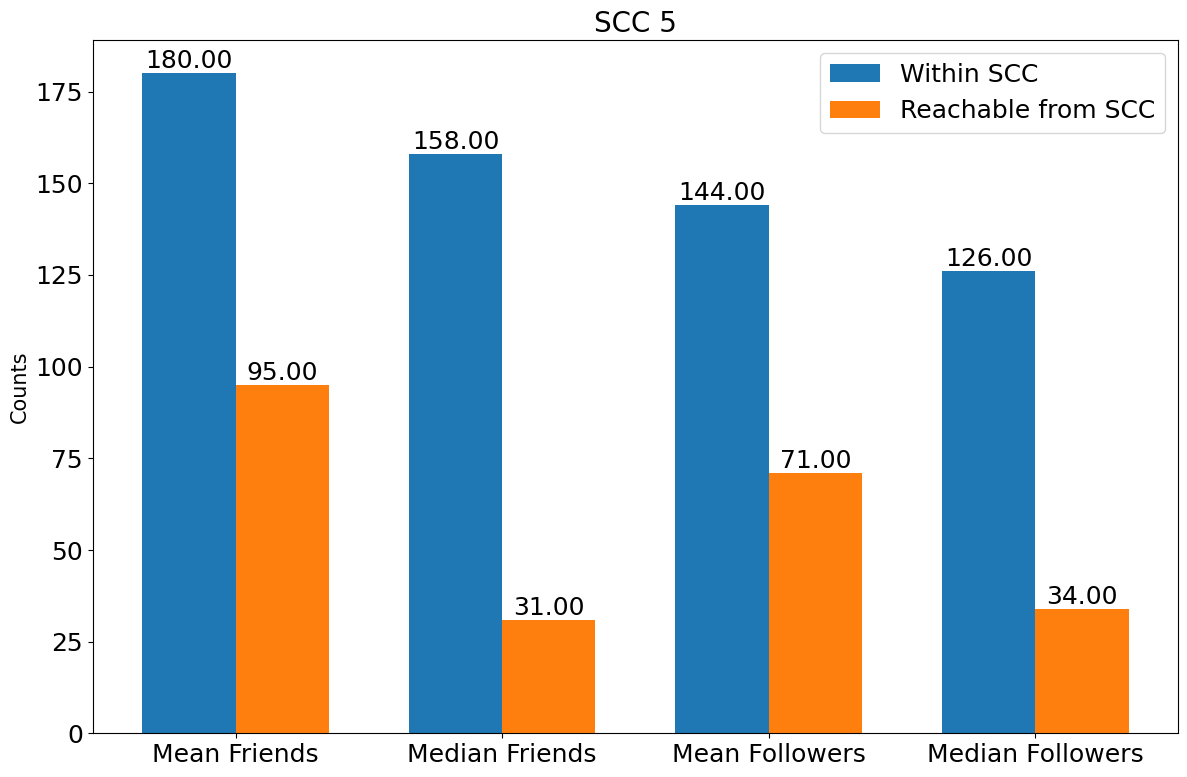

In [107]:
get_friends_followers_stat(all_scc[4], "SCC 5")

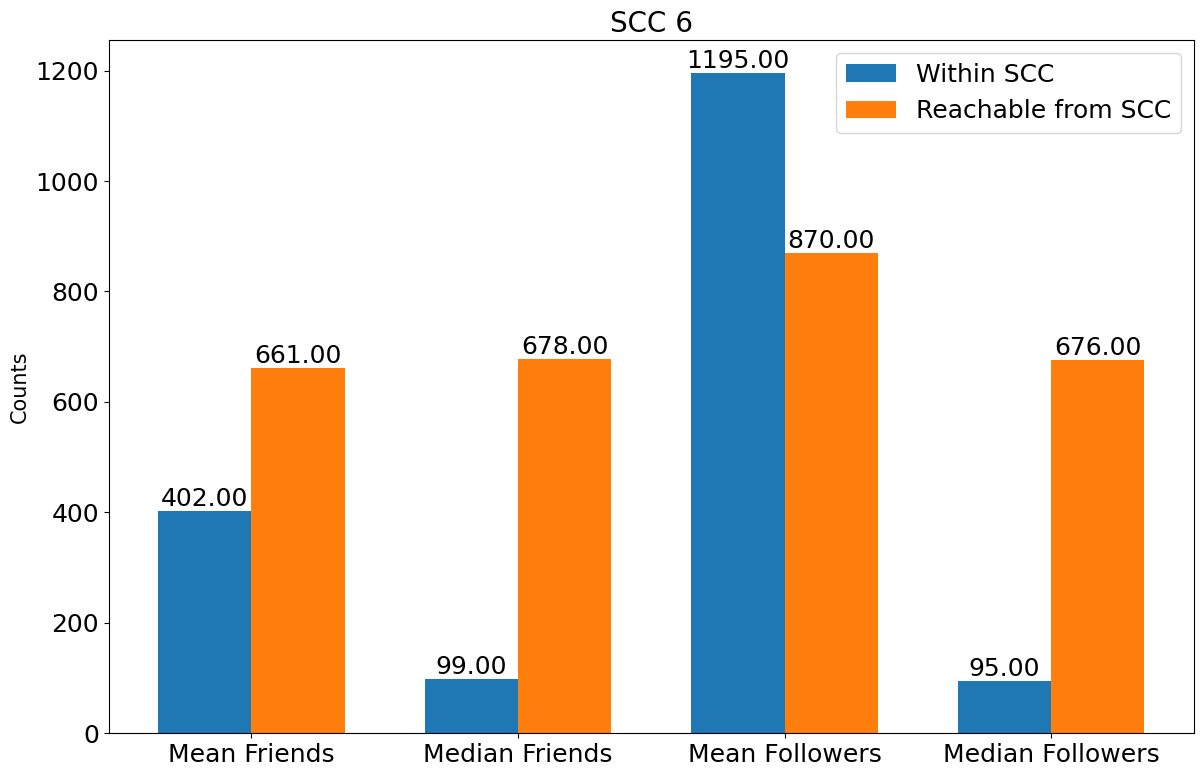

In [108]:
get_friends_followers_stat(all_scc[5], "SCC 6")

In [46]:
def plot_user_activity_evolution(selected_scc, plot_title):

    df_network_scc = df_network[df_network['user.id'].isin(selected_scc) | df_network['quoted_status.user.id'].isin(selected_scc)]
    df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
    
    relevant_timestamps = df_network_scc[df_network_scc['user.id'].isin(selected_scc)]['created_at'].unique()
    relevant_timestamps = relevant_timestamps[relevant_timestamps >= pd.Timestamp('2022-11-09')]
    
    instances = []
    
    for timestamp in relevant_timestamps:
        instances.append(np.searchsorted(df_network_scc['created_at'], timestamp, side='right'))
        
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    color = 'tab:blue'
    ax1.set_title(plot_title, fontsize=16)
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Cumulative Number of Instances')
    ax1.plot(relevant_timestamps, instances, marker='o', markersize=3, linewidth=0.5, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()
        
    plt.savefig("figures/"+plot_title.replace(" ", "_").lower()+"_evolution.pdf", format="pdf", bbox_inches='tight')

    plt.show()

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_26607/2369296087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


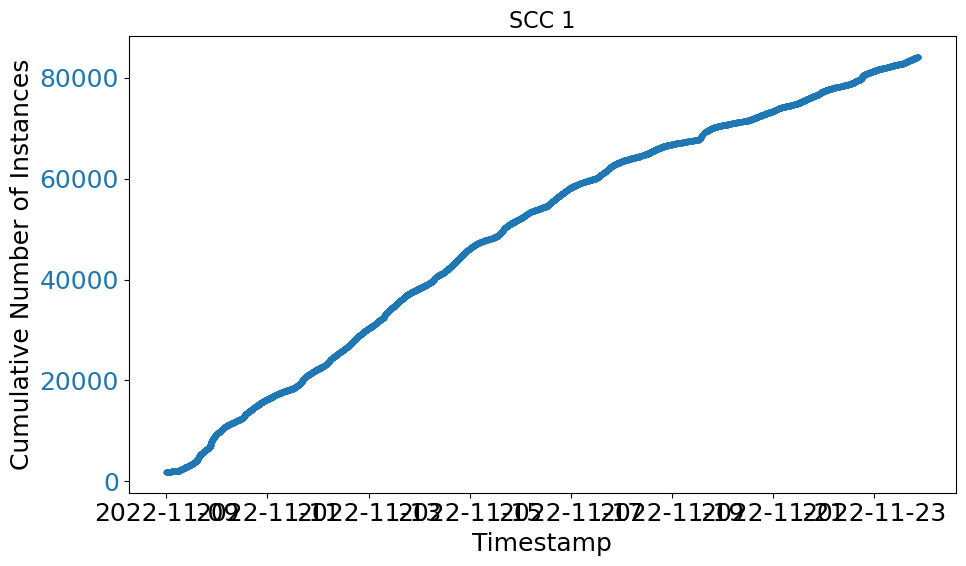

In [47]:
plot_user_activity_evolution(all_scc[0], "SCC 1")

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_26607/2369296087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


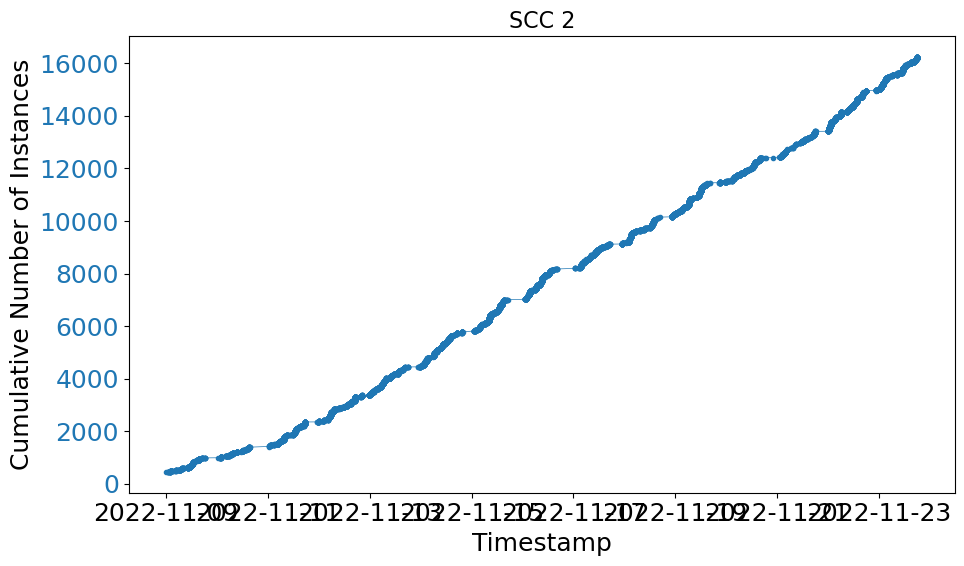

In [48]:
plot_user_activity_evolution(all_scc[1], "SCC 2")

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_26607/2369296087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


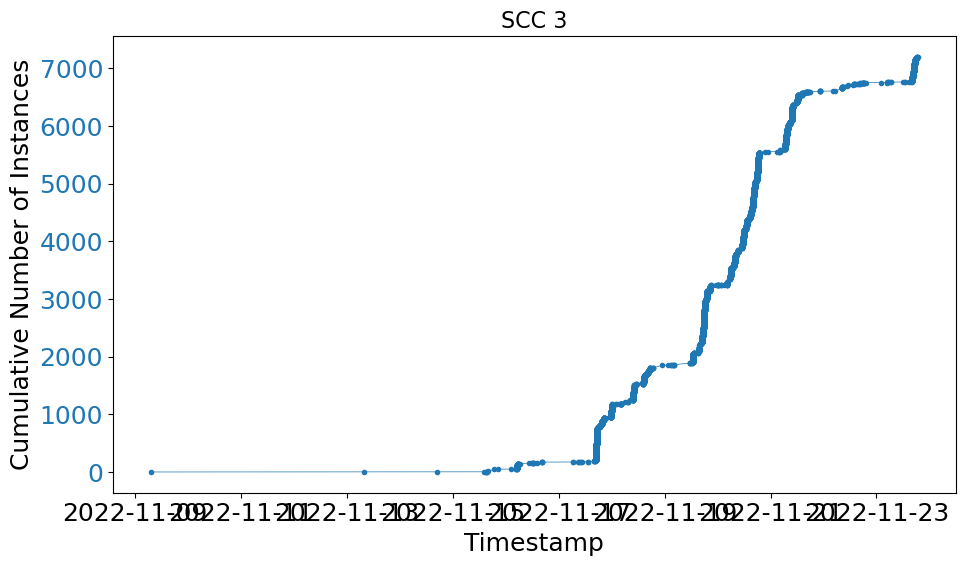

In [49]:
plot_user_activity_evolution(all_scc[2], "SCC 3")

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_26607/2369296087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


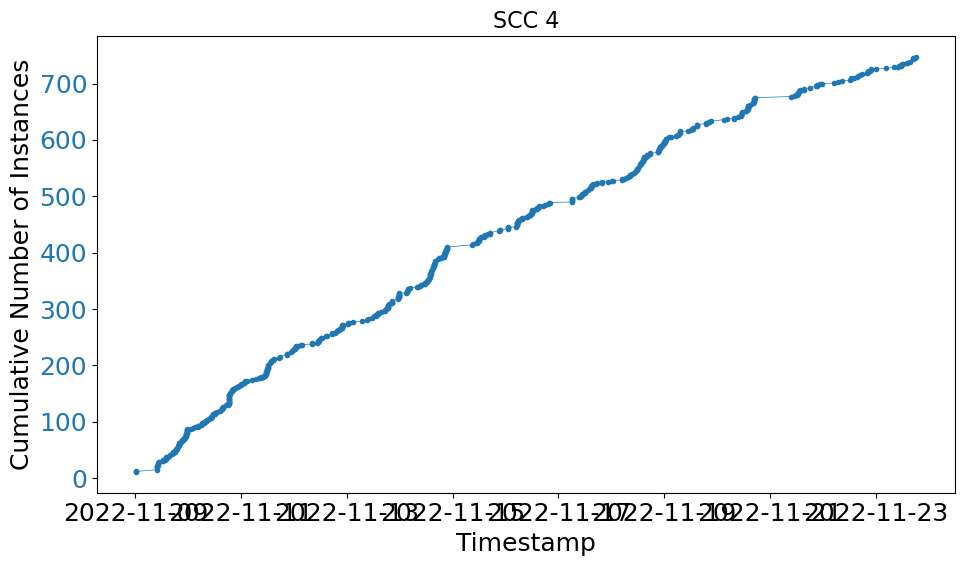

In [50]:
plot_user_activity_evolution(all_scc[3], "SCC 4")

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_26607/2369296087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


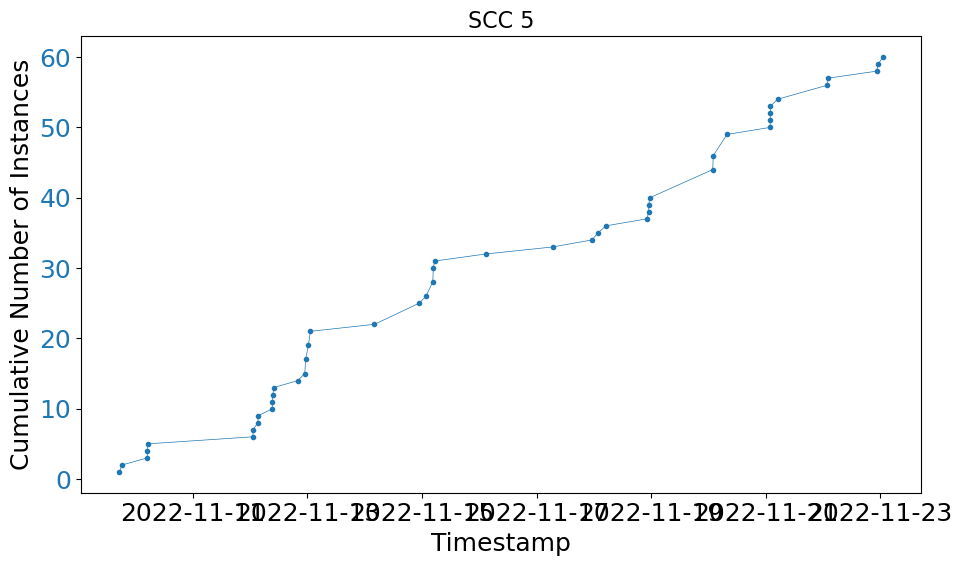

In [51]:
plot_user_activity_evolution(all_scc[4], "SCC 5")

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_26607/2369296087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


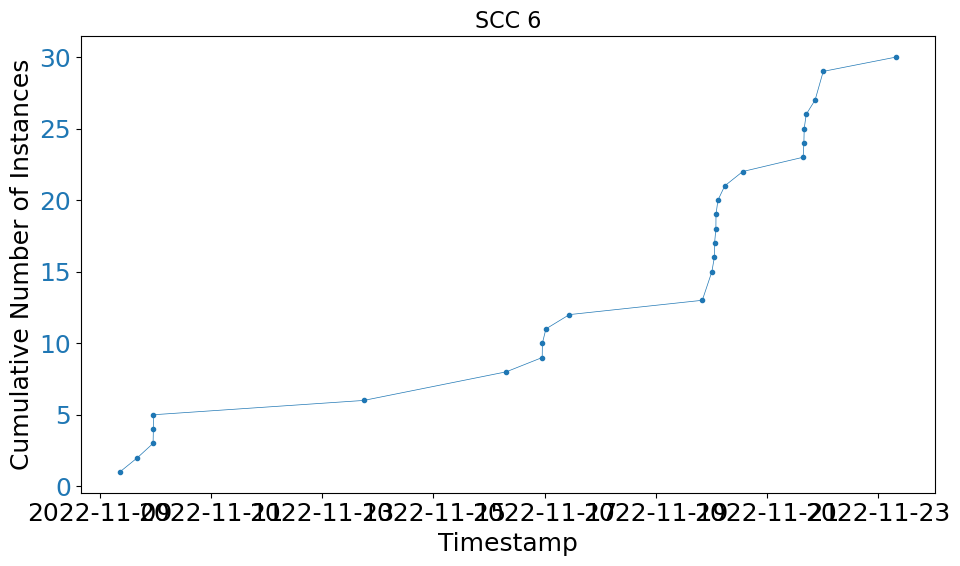

In [52]:
plot_user_activity_evolution(all_scc[5], "SCC 6")

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_26607/1451814609.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_26607/1451814609.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
/var/folders/mr/lkxzqtl162nc8

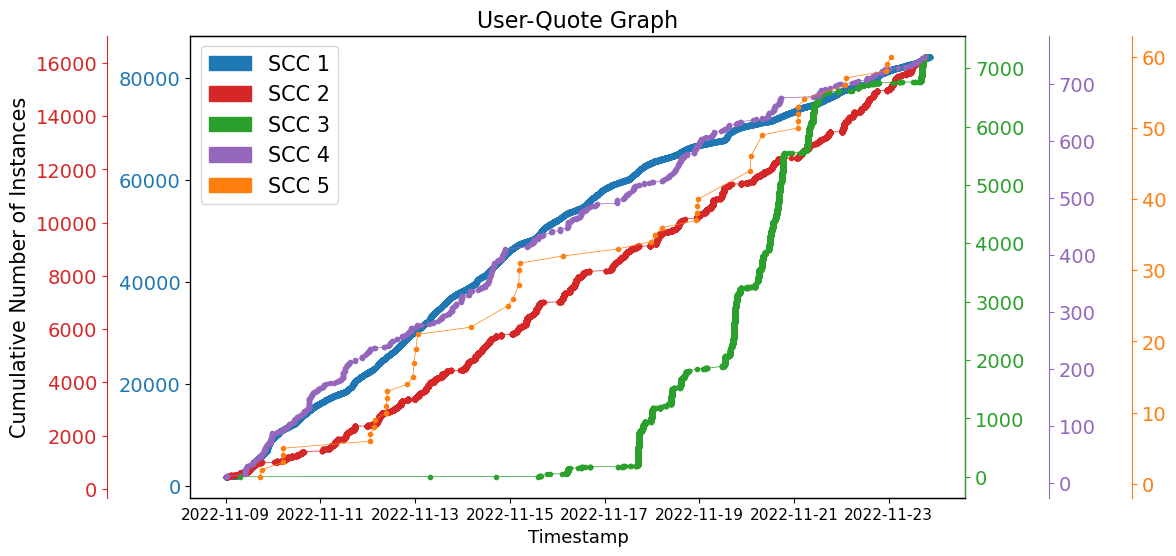

In [110]:
import matplotlib.patches as mpatches

selected_scc = all_scc[0]
df_network_scc = df_network[df_network['user.id'].isin(selected_scc) | df_network['quoted_status.user.id'].isin(selected_scc)]
df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

relevant_timestamps1 = df_network_scc[df_network_scc['user.id'].isin(selected_scc)]['created_at'].unique()
relevant_timestamps1 = relevant_timestamps1[relevant_timestamps1 >= pd.Timestamp('2022-11-09')]

instances1 = []

for timestamp in relevant_timestamps1:
    instances1.append(np.searchsorted(df_network_scc['created_at'], timestamp, side='right'))
    

selected_scc = all_scc[1]
df_network_scc = df_network[df_network['user.id'].isin(selected_scc) | df_network['quoted_status.user.id'].isin(selected_scc)]
df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

relevant_timestamps2 = df_network_scc[df_network_scc['user.id'].isin(selected_scc)]['created_at'].unique()
relevant_timestamps2 = relevant_timestamps2[relevant_timestamps2 >= pd.Timestamp('2022-11-09')]

instances2 = []

for timestamp in relevant_timestamps2:
    instances2.append(np.searchsorted(df_network_scc['created_at'], timestamp, side='right'))


selected_scc = all_scc[2]
df_network_scc = df_network[df_network['user.id'].isin(selected_scc) | df_network['quoted_status.user.id'].isin(selected_scc)]
df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

relevant_timestamps3 = df_network_scc[df_network_scc['user.id'].isin(selected_scc)]['created_at'].unique()
relevant_timestamps3 = relevant_timestamps3[relevant_timestamps3 >= pd.Timestamp('2022-11-09')]

instances3 = []

for timestamp in relevant_timestamps3:
    instances3.append(np.searchsorted(df_network_scc['created_at'], timestamp, side='right'))


selected_scc = all_scc[3]
df_network_scc = df_network[df_network['user.id'].isin(selected_scc) | df_network['quoted_status.user.id'].isin(selected_scc)]
df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

relevant_timestamps4 = df_network_scc[df_network_scc['user.id'].isin(selected_scc)]['created_at'].unique()
relevant_timestamps4 = relevant_timestamps4[relevant_timestamps4 >= pd.Timestamp('2022-11-09')]

instances4 = []

for timestamp in relevant_timestamps4:
    instances4.append(np.searchsorted(df_network_scc['created_at'], timestamp, side='right'))



selected_scc = all_scc[4]
df_network_scc = df_network[df_network['user.id'].isin(selected_scc) | df_network['quoted_status.user.id'].isin(selected_scc)]
df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

relevant_timestamps5 = df_network_scc[df_network_scc['user.id'].isin(selected_scc)]['created_at'].unique()
relevant_timestamps5 = relevant_timestamps5[relevant_timestamps5 >= pd.Timestamp('2022-11-09')]

instances5 = []

for timestamp in relevant_timestamps5:
    instances5.append(np.searchsorted(df_network_scc['created_at'], timestamp, side='right'))




selected_scc = all_scc[5]
df_network_scc = df_network[df_network['user.id'].isin(selected_scc) | df_network['quoted_status.user.id'].isin(selected_scc)]
df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

relevant_timestamps6 = df_network_scc[df_network_scc['user.id'].isin(selected_scc)]['created_at'].unique()
relevant_timestamps6 = relevant_timestamps6[relevant_timestamps6 >= pd.Timestamp('2022-11-09')]

instances6 = []

for timestamp in relevant_timestamps6:
    instances6.append(np.searchsorted(df_network_scc['created_at'], timestamp, side='right'))



    


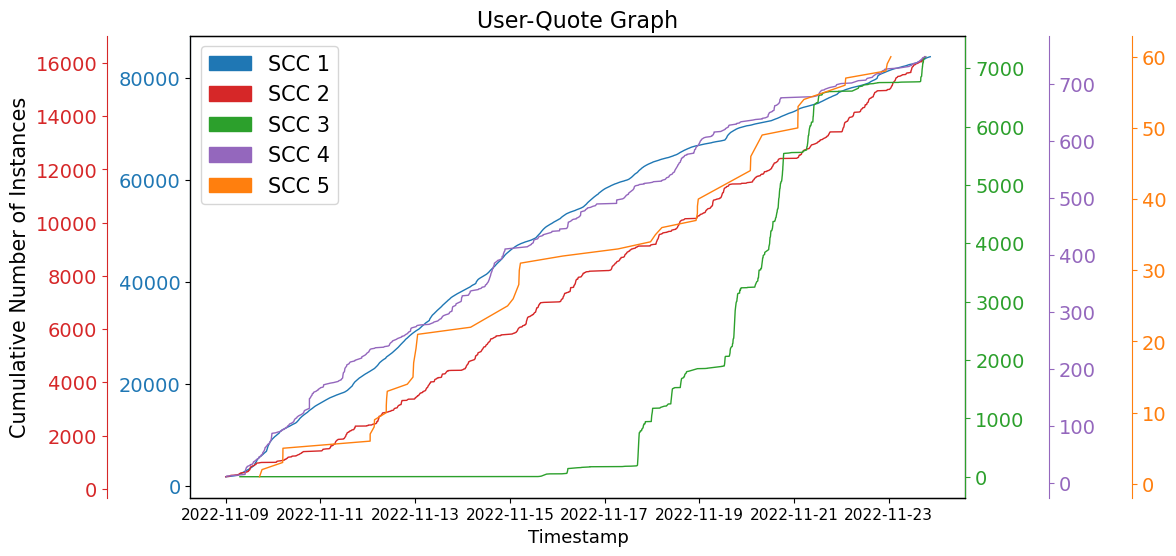

In [131]:

fig, ax1 = plt.subplots(figsize=(10, 6))

plt.rc('font', size=15)
# plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=14)

color1 = 'tab:blue'
color2 = 'tab:red'
color3 = 'tab:green'
color4 = 'tab:purple'
color5 = 'tab:orange'
color6 = 'tab:pink'


ax1.set_title("User-Quote Graph", fontsize=16)
ax1.set_xlabel('Timestamp', fontsize=13)
ax1.spines['left'].set_position(('outward', 0))
ax1.spines['left'].set_color(color1)
ax1.plot(relevant_timestamps1, instances1, linewidth=1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)


ax2 = ax1.twinx()
ax2.spines['left'].set_position(('outward', 60))
ax2.spines['left'].set_color(color2)
ax2.set_ylabel('Cumulative Number of Instances', color = 'black')
ax2.yaxis.tick_left()
ax2.yaxis.set_label_position('left')
ax2.tick_params(axis='y', colors=color2)
ax2.plot(relevant_timestamps2, instances2, linewidth=1, color=color2)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 0))
ax3.spines['right'].set_color(color3)
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.tick_params(axis='y', colors=color3)
ax3.plot(relevant_timestamps3, instances3, linewidth=1, color=color3)

ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 60))
ax4.spines['right'].set_color(color4)
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position('right')
ax4.tick_params(axis='y', colors=color4)
ax4.plot(relevant_timestamps4, instances4, linewidth=1, color=color4)

ax5 = ax1.twinx()
ax5.spines['right'].set_position(('outward', 120))
ax5.spines['right'].set_color(color5)
ax5.yaxis.tick_right()
ax5.yaxis.set_label_position('right')
ax5.tick_params(axis='y', colors=color5)
ax5.plot(relevant_timestamps5, instances5, linewidth=1, color=color5)


# ax6 = ax1.twinx()
# ax6.spines['right'].set_position(('outward', 120))
# ax6.spines['right'].set_color(color6)
# ax6.yaxis.tick_right()
# ax6.yaxis.set_label_position('left')
# ax6.tick_params(axis='y', colors=color6)
# ax6.plot(relevant_timestamps6, instances6, marker='o', markersize=3, linewidth=0.5, color=color6)


patch1 = mpatches.Patch(color=color1, label='SCC 1')
patch2 = mpatches.Patch(color=color2, label='SCC 2')
patch3 = mpatches.Patch(color=color3, label='SCC 3')
patch4 = mpatches.Patch(color=color4, label='SCC 4')
patch5 = mpatches.Patch(color=color5, label='SCC 5')
# patch6 = mpatches.Patch(color=color6, label='SCC 6')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5])

plt.savefig("figures/user_quote_scc_evolution.pdf", format="pdf", bbox_inches='tight')

plt.show()